# Problem Statement: Rent Price Prediction Model
In a new city, individuals often struggle to estimate fair rental prices due to lack of local knowledge and potential exploitation by landlords. The variability in rental rates can be influenced by multiple factors, making it difficult for newcomers to assess fair market value. The objective of this project is to develop a rent price prediction model using machine learning techniques. This model will leverage various features associated with rental properties (such as location, property size, number of bedrooms, amenities, and proximity to transportation) to estimate rental prices accurately.

The goal is to empower individuals, especially newcomers to the city, with a tool that can predict rental prices based on key property attributes. By providing renters with accurate rental price estimates, this project aims to enable informed decision-making and facilitate fair negotiations with landlords.

### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset
Dataset Summary: Rental Property Information

The dataset used for this project was obtained from Kaggle and is provided in CSV format. It contains detailed information about rental properties, including various features that influence rental prices. The dataset includes the following key features:

* BHK (Bedrooms, Hall, Kitchen): Number of bedrooms and other living spaces in the property.
* Area: Total area or size of the property in square feet.
* Price: Rental price of the property in the local currency.
* City: Location or city where the property is situated.
* Floor: Level or floor on which the property is located within the building.
* Size: Specific dimensions or configuration of the property.
* Bathroom: Number of bathrooms available in the property.
* Furnishing Status: Indicates whether the property is furnished, semi-furnished, or unfurnished.

The dataset aims to capture the diversity of rental properties across different cities, with a focus on features that are commonly considered when determining rental prices. By leveraging this dataset, the goal is to train a machine learning model that can predict rental prices based on these features, thereby assisting individuals in estimating fair rental rates in unfamiliar locations.

Key preprocessing steps may involve handling missing data, encoding categorical variables (such as city and furnishing status), and scaling numerical features for model training. Exploratory data analysis will be conducted to understand feature distributions, correlations, and potential outliers, guiding the development of an accurate rent price prediction model.



In [2]:
df=pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Basic Information about the Dataset

In [3]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### Observation
* There are no null values present in the dataset

#### There are various thing s wrong with the data 
Lets fix them 
* 'Floor' Column

In [7]:
df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

#### Observation
* We see the column type is 'obj' we need to change it to 'int'.
* We need to make sure we only get the floor number for eg:- "'1' out of .... "
* We also need to make sure we replace values like 'ground' , 'Lower ground' etc

In [8]:
df['Floor'] = df['Floor'].str.split(' out of ').str[0]

In [9]:
df['Floor'] = df['Floor'].replace({
    'Ground': '0',
    'Upper Basement': '101',
    'Lower Basement': '102'
}, regex=True)

In [10]:
df['Floor'] = df['Floor'].astype(int)

* 'Point of Contact' Column

In [11]:
df['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

#### Observations
* Replace 'Contact' with blank space 

In [12]:
df['Point of Contact'] = df['Point of Contact'].str.replace('Contact ','')

In [13]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Owner
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Owner
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Owner
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Owner
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Owner
4742,2022-05-15,3,29000,2000,1,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Owner
4743,2022-07-10,3,35000,1750,3,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Agent
4744,2022-07-06,3,45000,1500,23,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Agent


#### Lets check the other columns as well 

In [14]:
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [15]:
df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [16]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

### Now we try to see the co-relations between our features 
As we are going to predict Rent 
'Rent' will be our output/dependent feature where as all the other features will be our independent feature

* Step 1 - Drop un-necessary columns

In [17]:
df_final = df.drop(columns=['Posted On','Area Type','Area Locality','Point of Contact'])
df_final

,BHK,Rent,Size,Floor,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,0,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,3,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,23,Hyderabad,Semi-Furnished,Family,2


In [18]:
df_final.corr()['Rent']

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\2029951356.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()['Rent']


BHK         0.369718
Rent        1.000000
Size        0.413551
Floor       0.210583
Bathroom    0.441215
Name: Rent, dtype: float64

#### Observations
* We can see a moderately positive co-relation between "BHK vs Rent" , "Size vs Rent" , "Bathroom vs Rent"

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\4140759874.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(),annot=True)


<Axes: >

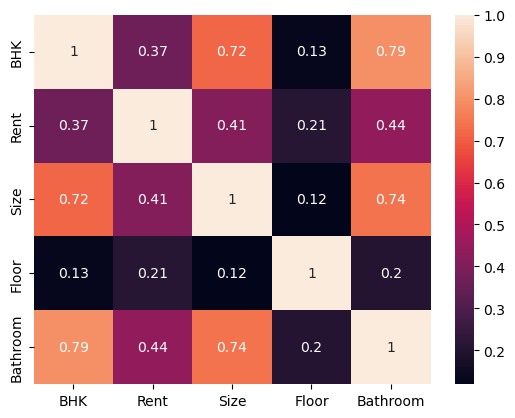

In [19]:
sns.heatmap(df_final.corr(),annot=True)

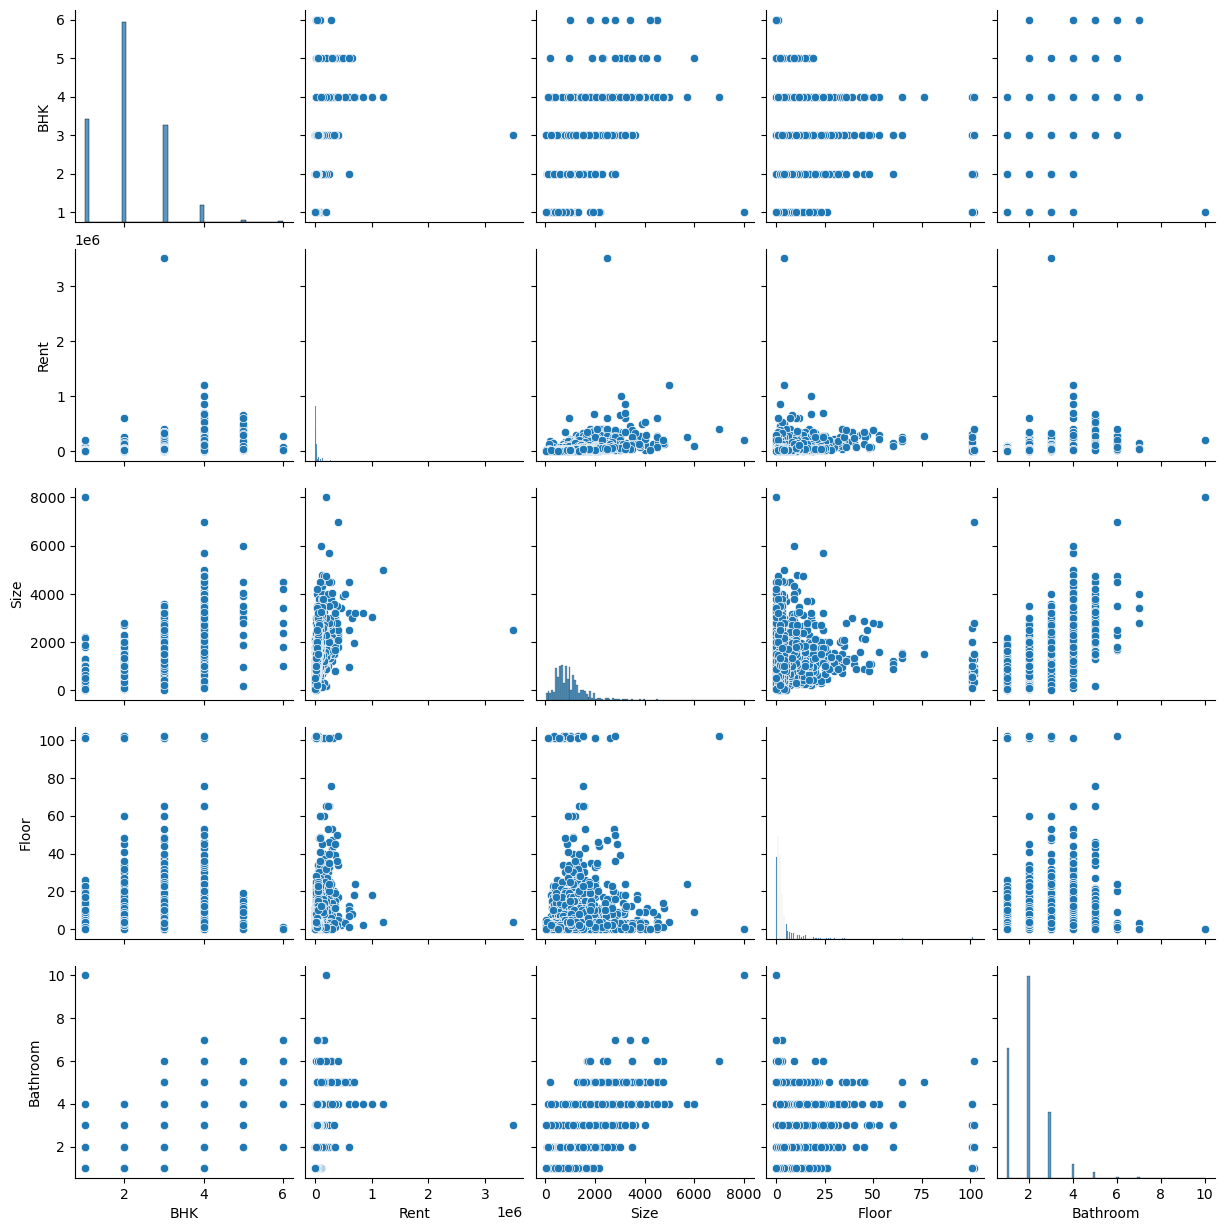

In [20]:
sns.pairplot(df_final)

* From the figure we can conclude that Linear Regresssion will work well on the data 

#### We need to encode our Categorical features for the ML Algorithm. We need to encode 3 columns
* Furnishing Status
* City
* Tenant Preferred

For this we would use one hot encoding as the variables are ordinal.

In [21]:
df_encoded_city = pd.get_dummies(df['City'], prefix='city_status')
df_encoded_status = pd.get_dummies(df['Furnishing Status'], prefix='Furnishing_status')
df_encoded_tenant = pd.get_dummies(df['Tenant Preferred'], prefix='Tenant_preferred')

* Now we need to join it in the original dataframe and drop the categorical features 

In [22]:
df_final = pd.concat([df_final, df_encoded_city, df_encoded_status, df_encoded_tenant], axis=1)
df_final

,BHK,Rent,Size,Floor,City,Furnishing Status,Tenant Preferred,Bathroom,city_status_Bangalore,city_status_Chennai,city_status_Delhi,city_status_Hyderabad,city_status_Kolkata,city_status_Mumbai,Furnishing_status_Furnished,Furnishing_status_Semi-Furnished,Furnishing_status_Unfurnished,Tenant_preferred_Bachelors,Tenant_preferred_Bachelors/Family,Tenant_preferred_Family
0,2,10000,1100,0,Kolkata,Unfurnished,Bachelors/Family,2,0,0,0,0,1,0,0,0,1,0,1,0
1,2,20000,800,1,Kolkata,Semi-Furnished,Bachelors/Family,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,17000,1000,1,Kolkata,Semi-Furnished,Bachelors/Family,1,0,0,0,0,1,0,0,1,0,0,1,0
3,2,10000,800,1,Kolkata,Unfurnished,Bachelors/Family,1,0,0,0,0,1,0,0,0,1,0,1,0
4,2,7500,850,1,Kolkata,Unfurnished,Bachelors,1,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Hyderabad,Semi-Furnished,Bachelors/Family,2,0,0,0,1,0,0,0,1,0,0,1,0
4742,3,29000,2000,1,Hyderabad,Semi-Furnished,Bachelors/Family,3,0,0,0,1,0,0,0,1,0,0,1,0
4743,3,35000,1750,3,Hyderabad,Semi-Furnished,Bachelors/Family,3,0,0,0,1,0,0,0,1,0,0,1,0
4744,3,45000,1500,23,Hyderabad,Semi-Furnished,Family,2,0,0,0,1,0,0,0,1,0,0,0,1


In [23]:
df_final.corr()['Rent']

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\2029951356.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()['Rent']


BHK                                  0.369718
Rent                                 1.000000
Size                                 0.413551
Floor                                0.210583
Bathroom                             0.441215
city_status_Bangalore               -0.061512
city_status_Chennai                 -0.082361
city_status_Delhi                   -0.027072
city_status_Hyderabad               -0.087465
city_status_Kolkata                 -0.105322
city_status_Mumbai                   0.327038
Furnishing_status_Furnished          0.110576
Furnishing_status_Semi-Furnished     0.045309
Furnishing_status_Unfurnished       -0.126271
Tenant_preferred_Bachelors           0.042151
Tenant_preferred_Bachelors/Family   -0.078774
Tenant_preferred_Family              0.063941
Name: Rent, dtype: float64

* Observations
There are many positively co-related feature and negatively co-related features as well

In [59]:
df =df_final.drop(columns=['Rent','City','Furnishing Status','Tenant Preferred'],axis=1)
df

,BHK,Size,Floor,Bathroom,city_status_Bangalore,city_status_Chennai,city_status_Delhi,city_status_Hyderabad,city_status_Kolkata,city_status_Mumbai,Furnishing_status_Furnished,Furnishing_status_Semi-Furnished,Furnishing_status_Unfurnished,Tenant_preferred_Bachelors,Tenant_preferred_Bachelors/Family,Tenant_preferred_Family
0,2,1100,0,2,0,0,0,0,1,0,0,0,1,0,1,0
1,2,800,1,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,1000,1,1,0,0,0,0,1,0,0,1,0,0,1,0
3,2,800,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,2,850,1,1,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,3,2,0,0,0,1,0,0,0,1,0,0,1,0
4742,3,2000,1,3,0,0,0,1,0,0,0,1,0,0,1,0
4743,3,1750,3,3,0,0,0,1,0,0,0,1,0,0,1,0
4744,3,1500,23,2,0,0,0,1,0,0,0,1,0,0,0,1


In [60]:
df.to_csv('Cleaned_data.csv')

#### Now we divide the dataset into dependent and independent features 
* y = output feature
* X = Independent feature

In [24]:
X=df_final.drop(columns=['Rent','City','Furnishing Status','Tenant Preferred'],axis=1)
X

,BHK,Size,Floor,Bathroom,city_status_Bangalore,city_status_Chennai,city_status_Delhi,city_status_Hyderabad,city_status_Kolkata,city_status_Mumbai,Furnishing_status_Furnished,Furnishing_status_Semi-Furnished,Furnishing_status_Unfurnished,Tenant_preferred_Bachelors,Tenant_preferred_Bachelors/Family,Tenant_preferred_Family
0,2,1100,0,2,0,0,0,0,1,0,0,0,1,0,1,0
1,2,800,1,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,1000,1,1,0,0,0,0,1,0,0,1,0,0,1,0
3,2,800,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,2,850,1,1,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,3,2,0,0,0,1,0,0,0,1,0,0,1,0
4742,3,2000,1,3,0,0,0,1,0,0,0,1,0,0,1,0
4743,3,1750,3,3,0,0,0,1,0,0,0,1,0,0,1,0
4744,3,1500,23,2,0,0,0,1,0,0,0,1,0,0,0,1


In [25]:
y=df_final['Rent']
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

### Lets import the train_test_split for training and testing sets, LinearRegression for model training and prediction and r2_score for acccuracy score

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)
y_pred

array([ 3.13616601e+04,  2.02550839e+04,  6.42571160e+04,  7.09872578e+04,
        8.43139550e+04,  1.17396864e+04,  8.22596366e+04,  1.65006628e+04,
        1.78192606e+05,  6.09917028e+03, -5.59924429e+03, -1.10719520e+03,
        3.25066135e+04, -4.62766953e+03,  3.21048564e+04,  4.92429649e+04,
        1.10309362e+05, -9.86340616e+03,  8.43655391e+03,  8.40601025e+04,
        4.05711627e+04, -2.86802220e+04,  5.50912012e+04,  3.00530580e+04,
        1.55740515e+05,  3.39419789e+02, -7.22452969e+03,  7.01568871e+04,
       -4.87801626e+03,  1.27190253e+03, -1.07775883e+04,  7.79448721e+02,
        5.77852203e+03,  1.32489485e+04,  3.34731624e+04,  6.08278022e+04,
       -2.87753679e+02, -2.52852030e+04,  2.81246808e+04,  5.34438518e+03,
        1.88810873e+04,  1.90675465e+05,  2.21324635e+04, -7.38256934e+03,
        7.46088191e+04,  1.27356753e+03,  6.50988987e+04,  1.01559877e+05,
        2.12372211e+05,  4.41579740e+04,  7.45876997e+03,  5.43771842e+04,
        2.59186940e+04,  

In [31]:
mse = mean_squared_error(y_test, y_pred, squared=False)
mse

43723.60870967522

In [32]:
score = r2_score(y_test, y_pred)
score

0.5203083954955697

#### Observations
* We have a mean square error of 43723 and an r2 score of 52% 

This is not good so we will try to enhance the accuracy of model using Polynomial regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)

In [34]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [35]:
X_train_poly

array([[1.00e+00, 2.00e+00, 9.50e+02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+00, 8.00e+02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00, 5.45e+02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.00e+00, 2.00e+00, 8.00e+02, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 3.00e+00, 3.50e+03, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [36]:
model.fit(X_train_poly,y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test_poly)
y_pred

array([ 1.21936444e+04,  2.05918877e+04,  2.21242967e+04,  5.42513585e+04,
        3.09726975e+04,  1.21858641e+04,  5.14986724e+04,  4.05899470e+03,
        3.27254535e+05,  9.75677937e+03,  5.81362062e+03,  1.31313716e+04,
        5.32592155e+04,  9.59051700e+03,  1.67995445e+04,  4.11936540e+04,
        7.10840226e+04,  1.16921288e+04,  1.19891037e+04,  5.33594597e+04,
        3.64672803e+04,  1.49144441e+04,  3.90920408e+04,  3.36257967e+04,
        1.52445062e+05,  7.44829052e+03,  6.34259341e+03,  4.68869298e+04,
        2.39478966e+04,  4.19084568e+04, -4.25953959e+02,  1.20415628e+04,
        1.62173820e+04,  1.15362937e+04,  4.23292357e+04,  2.04318875e+04,
        8.92058949e+03,  1.34720454e+04,  2.01368190e+04,  6.77344335e+03,
        1.37818168e+04,  3.70756503e+05,  2.10260275e+04,  2.56789410e+03,
        5.12358965e+04,  6.93156824e+03,  2.61242013e+04,  9.56865774e+04,
        4.26710070e+05,  2.71199108e+04,  1.51642516e+04,  2.54141085e+04,
        2.04567396e+04,  

In [38]:
score = r2_score(y_test,y_pred)
print(score)

0.7586041813443392


In [39]:
mse = mean_absolute_error(y_test,y_pred)
mse

14820.969629710198

In [40]:
X_train

,BHK,Size,Floor,Bathroom,city_status_Bangalore,city_status_Chennai,city_status_Delhi,city_status_Hyderabad,city_status_Kolkata,city_status_Mumbai,Furnishing_status_Furnished,Furnishing_status_Semi-Furnished,Furnishing_status_Unfurnished,Tenant_preferred_Bachelors,Tenant_preferred_Bachelors/Family,Tenant_preferred_Family
1995,2,950,6,2,1,0,0,0,0,0,0,1,0,0,1,0
1497,2,800,3,2,1,0,0,0,0,0,0,1,0,0,1,0
2763,1,545,2,1,0,0,1,0,0,0,1,0,0,0,1,0
1351,1,465,3,1,0,0,0,0,0,1,0,1,0,1,0,0
1862,2,900,4,2,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3,1500,1,3,0,0,0,1,0,0,0,1,0,0,0,1
466,3,1200,3,2,0,0,0,0,1,0,0,0,1,0,1,0
3092,2,800,13,2,0,1,0,0,0,0,0,1,0,0,0,1
3772,3,3500,0,3,0,1,0,0,0,0,0,1,0,0,1,0


In [41]:
X_train_poly.shape

(3796, 153)

#### Observation
* When we use polynomial regression we could increase our r2 score to 75.86% and could reduce the mean square error to about 14820

In [42]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# Assuming X_train contains the training data and y_train contains the target variable

# Create a pipeline for polynomial regression with feature selection
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(Ridge(alpha=1.0))),
    ('regression', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
# Assuming X_valid contains the validation data
mse = mean_squared_error(y_test, pipeline.predict(X_test))
r2 = r2_score(y_test, pipeline.predict(X_test))

print("Validation MSE:", mse)
print("Validation R^2 score:", r2)


Validation MSE: 940854501.3969835
Validation R^2 score: 0.7639235931219934


In [43]:
X_train

,BHK,Size,Floor,Bathroom,city_status_Bangalore,city_status_Chennai,city_status_Delhi,city_status_Hyderabad,city_status_Kolkata,city_status_Mumbai,Furnishing_status_Furnished,Furnishing_status_Semi-Furnished,Furnishing_status_Unfurnished,Tenant_preferred_Bachelors,Tenant_preferred_Bachelors/Family,Tenant_preferred_Family
1995,2,950,6,2,1,0,0,0,0,0,0,1,0,0,1,0
1497,2,800,3,2,1,0,0,0,0,0,0,1,0,0,1,0
2763,1,545,2,1,0,0,1,0,0,0,1,0,0,0,1,0
1351,1,465,3,1,0,0,0,0,0,1,0,1,0,1,0,0
1862,2,900,4,2,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3,1500,1,3,0,0,0,1,0,0,0,1,0,0,0,1
466,3,1200,3,2,0,0,0,0,1,0,0,0,1,0,1,0
3092,2,800,13,2,0,1,0,0,0,0,0,1,0,0,0,1
3772,3,3500,0,3,0,1,0,0,0,0,0,1,0,0,1,0


In [44]:
pipeline.predict([[2,500,4,2,0,0,0,0,0,1,1,0,0,1,0,0]])

F:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([28808.54509791])

In [45]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# Assuming X_train contains the training data and y_train contains the target variable

# Create a pipeline for polynomial regression with feature selection
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(Ridge(alpha=1.0))),
    ('regression', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
# Assuming X_valid contains the validation data
mse = mean_squared_error(y_test, pipeline.predict(X_test))
r2 = r2_score(y_test, pipeline.predict(X_test))

print("Validation MSE:", mse)
print("Validation R^2 score:", r2)

Validation MSE: 940854501.3969835
Validation R^2 score: 0.7639235931219934


In [50]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create a pipeline for polynomial regression with hyperparameter tuning
# Define a pipeline that includes polynomial feature transformation, scaling, and linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Adding polynomial features
    ('scale', StandardScaler()),     # Scaling features
    ('reg', LinearRegression())      # Linear regression model
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'poly__degree': [2, 3,4,5,1],            # Try different degrees of polynomial features
    'reg__fit_intercept': [True, False]    # Whether to normalize the regression coefficients
}

# Step 3: Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2',)  # Use cross-validation for tuning
grid_search.fit(X_train, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 4: Evaluate the model with cross-validation
# Use the best model obtained from grid search
best_model = grid_search.best_estimator_

# Evaluate using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Step 5: Final evaluation on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)


Best Hyperparameters: {'poly__degree': 2, 'reg__fit_intercept': True}
Cross-Validation Scores: [0.46990189 0.17431662 0.61705796 0.6531567  0.6524529 ]
Mean CV Score: 0.5133772148647366
Test Set Score: 0.7554868518944287


In [51]:
y_pred = grid_search.predict(X_test)
y_pred

In [55]:
hyper_r2 = r2_score(y_test,y_pred)
print(hyper_r2)

0.7554868518944287


In [56]:
import pickle

In [58]:
file_path = 'model.pkl'

# Open the file in write-binary mode and serialize the model using pickle
with open(file_path, 'wb') as file:
    pickle.dump(pipeline, file)